Graph H: Original graph
Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


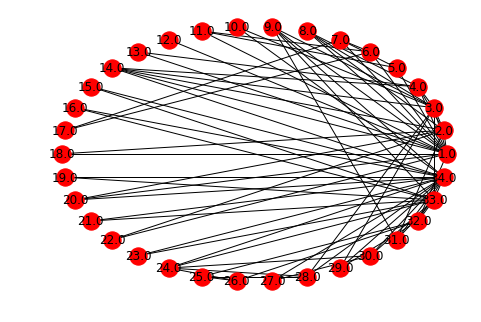

set1
{'16.0', '19.0', '31.0', '23.0', '34.0', '24.0', '25.0', '33.0', '26.0', '21.0', '30.0', '27.0', '9.0', '28.0', '15.0', '29.0', '32.0'}
Name: 
Type: SubGraph
Number of nodes: 17
Number of edges: 34
Average degree:   4.0000


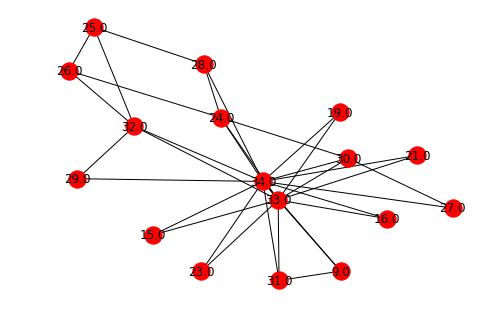

set2
{'22.0', '1.0', '7.0', '2.0', '4.0', '10.0', '11.0', '20.0', '8.0', '13.0', '14.0', '5.0', '18.0', '12.0', '6.0', '17.0', '3.0'}
Name: 
Type: SubGraph
Number of nodes: 17
Number of edges: 34
Average degree:   4.0000


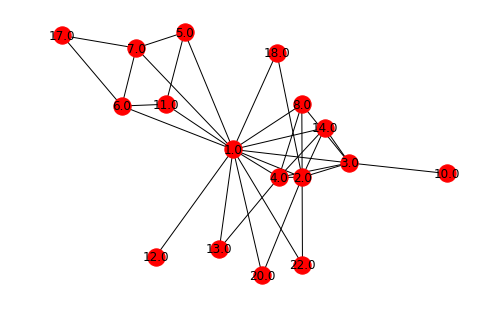

Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)
Level  1
{'22.0', '20.0', '11.0', '8.0', '1.0', '13.0', '7.0', '14.0', '5.0', '2.0', '12.0', '18.0', '6.0', '4.0', '17.0'}
Name: 
Type: SubGraph
Number of nodes: 15
Number of edges: 28
Average degree:   3.7333



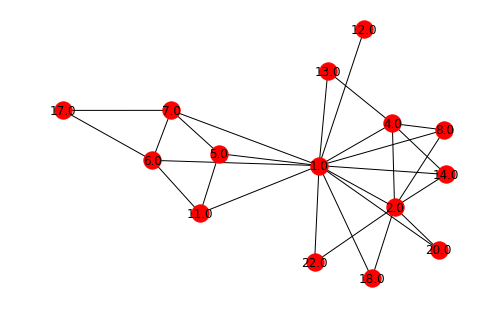

Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)
Level  2
{'27.0', '16.0', '30.0', '9.0', '28.0', '19.0', '15.0', '29.0', '31.0', '23.0', '34.0', '33.0', '32.0', '24.0', '25.0', '26.0', '10.0', '21.0', '3.0'}
Name: 
Type: SubGraph
Number of nodes: 19
Number of edges: 40
Average degree:   4.2105



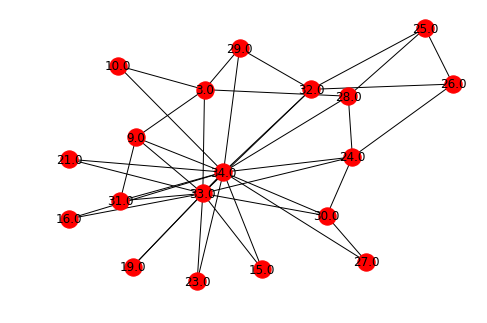

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as ny
from networkx.algorithms import community

'''
node 34 = the administrator
node 1 = the instructor
'''
print('Graph H: Original graph')
H=nx.read_graphml("problem1-ZacharysKarateClub.graphml")
print(nx.info(H))
nx.draw_circular(H, with_labels=True,weight=True)
plt.show()
plt.close()
print('============')

# partition the network into clusters using kernighan_lin_bisection
'''
The input to the algorithm is an undirected graph G = (V,E) with vertex set V, edge set E, and (optionally) 
numerical weights on the edges in E. The goal of the algorithm is to partition V into two disjoint subsets 
A and B of equal (or nearly equal) size, in a way that minimizes the sum T of the weights of the subset of 
edges that cross from A to B. If the graph is unweighted, then instead the goal is to minimize the number 
of crossing edges; this is equivalent to assigning weight one to each edge.
'''
(set1,set2)=community.kernighan_lin_bisection(H, partition=None, max_iter=40, weight='weight')
H1 = H.subgraph(set1)  # create a subgraph with notes in set1
H2 = H.subgraph(set2)  # create a subgraph with notes in set2

print ('set1')
print(set1)
print(nx.info(H1))
nx.draw(H1, with_labels=True,weight=True)
plt.show()
plt.close()
print('============')

print('set2')
print(set2)
print(nx.info(H2))
nx.draw(H2, with_labels=True,weight=True)
plt.show()
plt.close()  

# girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)
'''
Parameters:
1) G (NetworkX graph)
2) most_valuable_edge (function) – Function that takes a graph as input and outputs an edge. 
The edge returned by this function will be recomputed and removed at each iteration of the algorithm.
If not specified, the edge with the highest networkx.edge_betweenness_centrality() will be used
'''
communities_generator = community.girvan_newman(H)
i=0
for c in next(communities_generator):
    i+=1
    print("Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)")
    print("Level ", i)
    print(c)
    G = H.subgraph(c)
    print(nx.info(G))
    print('')
    nx.draw(G, with_labels=True,weight=True)
    plt.show()
    plt.close()
